# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
penguins_final = pd.get_dummies(penguins)
penguins_final.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Model 1
Y = penguins_final["bill_depth_mm"]
X_model1 = penguins_final[["bill_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X_model1, Y, test_size=0.25)

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
mse_train_model1 = mean_squared_error(y_train, y_train_pred)
mse_test_model1 = mean_squared_error(y_test, y_test_pred)

mse_train_model1, mse_test_model1

(3.3681047040010337, 4.552211613216748)

In [21]:
#Model 2
X_model2 = penguins_final[["bill_length_mm", "flipper_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X_model2, Y, test_size=0.25)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)
mse_train_model2 = mean_squared_error(y_train, y_train_pred)
mse_test_model2 = mean_squared_error(y_test, y_test_pred)

mse_train_model2, mse_test_model2

(2.5853467686380642, 1.96738921999284)

In [22]:
#Model 3
X_model3 = penguins_final[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]

X_train, X_test, y_train, y_test = train_test_split(X_model3, Y, test_size=0.25)

model3 = LinearRegression()
model3.fit(X_train, y_train)

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)
mse_train_model3 = mean_squared_error(y_train, y_train_pred)
mse_test_model3 = mean_squared_error(y_test, y_test_pred)

mse_train_model3, mse_test_model3

(2.2869642667932535, 2.8475846331679024)

In [23]:
#Model 4
X_model4 = penguins_final[["bill_length_mm", "flipper_length_mm", "species_Adelie", "sex_male"]]

X_train, X_test, y_train, y_test = train_test_split(X_model4, Y, test_size=0.25)

model4 = LinearRegression()
model4.fit(X_train, y_train)

y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)
mse_train_model4 = mean_squared_error(y_train, y_train_pred)
mse_test_model4 = mean_squared_error(y_test, y_test_pred)

mse_train_model4, mse_test_model4

(1.3218240619082535, 1.2396291467758094)

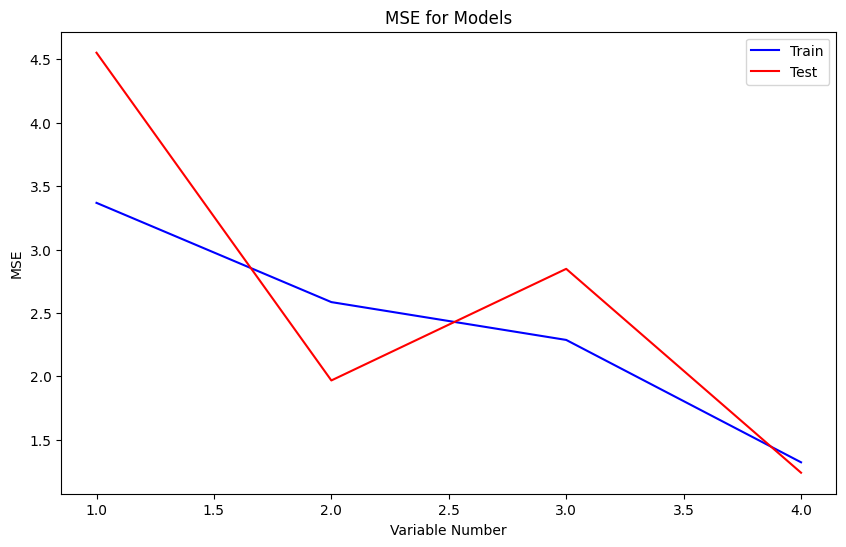

In [25]:
import matplotlib.pyplot as plt

train_errors = [mse_train_model1, mse_train_model2, mse_train_model3, mse_train_model4]
test_errors = [mse_test_model1, mse_test_model2, mse_test_model3, mse_test_model4]
variable_number = [1, 2, 3, 4]

plt.figure(figsize=(10, 6))
plt.plot(variable_number, train_errors, label='Train', color='blue')
plt.plot(variable_number, test_errors, label='Test', color='red')
plt.xlabel("Variable Number")
plt.ylabel("MSE")
plt.title("MSE for Models")
plt.legend()
plt.show()


Model 4 is the best predictor because it has low MSE for both the training and test data.